In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Notebooks/churn_prediction_simple.csv")

In [ ]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [ ]:
X=data.drop(columns=["churn","customer_id"])
Y=data["churn"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x_scaled=scale.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.2,stratify=Y)

# **Model Building**

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier=DTC(class_weight="balanced")

In [ ]:
classifier.fit(x_train,y_train)
predict_values=classifier.predict(x_train)

# **Performance**

In [ ]:
from sklearn.metrics import classification_report
k=classification_report(y_train,predict_values)
print(k)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [ ]:
# model preformance over test set
predicted=classifier.predict(x_test)
p=classification_report(y_test,predicted)
print(p)
# therefore the model is overfitting

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3559
           1       0.43      0.41      0.42       855

    accuracy                           0.78      4414
   macro avg       0.65      0.64      0.64      4414
weighted avg       0.78      0.78      0.78      4414



# **Visualizing Decision Tree**

In [ ]:
pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree=classifier,out_file="tree_viz",max_depth=None,feature_names=X.columns,label=None,impurity=False)

In [ ]:
from graphviz import render
render(filepath="/content/tree_viz",format="png",engine="neato")

'/content/tree_viz.png'

# **Hyperparameter tuning(max_depth , min_sample_split)**

In [ ]:
classifier=DTC()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import f1_score
def calc_score(model,x1,y1,x2,y2):
  model.fit(x1,y1)

  predict=model.predict(x1)
  f1=f1_score(y1,predict)

  predict=model.predict(x2)
  f2=f1_score(y2,predict)
  return f1,f2


In [ ]:
def effect(train_score,test_score,x_axis,title):
  plt.figure(figsize=(5,7),dpi=120)
  plt.plot(x_axis,train_score,color="red",label="train_score")
  plt.plot(x_axis,test_score,color="blue",label="test_score")
  plt.ylabel("f1_score")
  plt.legend()
  plt.show()

In [ ]:
maxdepth=[i for i in range(1,50)]
train=[]
test=[]
for i in maxdepth:
  classifier=DTC(class_weight="balanced",max_depth=i,random_state=42)
  f1,f2=calc_score(classifier,x_train,y_train,x_test,y_test)

  train.append(f1)
  test.append(f2)

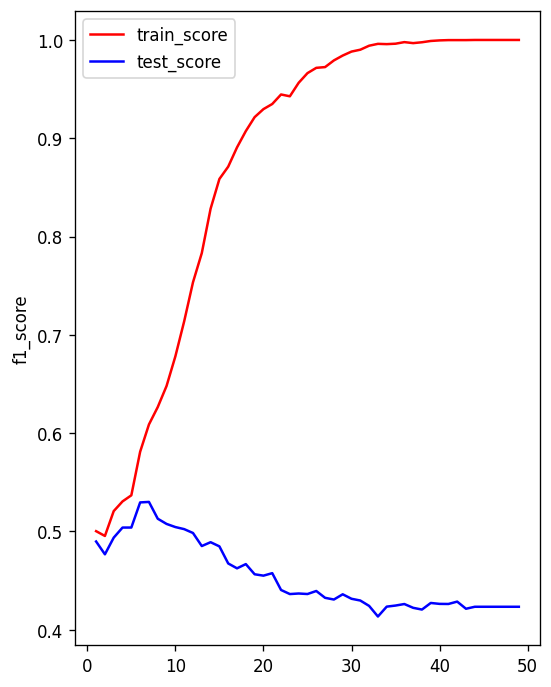

In [ ]:
effect(train,test,range(1,50),"Max Depth")

In [ ]:
# min_sample_split:minimum number of observations in any given node to split it
min_sample=[i for i in range(2,5000,25)]
train=[]
test=[]
for i in min_sample:
  classifier=DTC(class_weight="balanced",min_samples_split=i,random_state=42)
  f1,f2=calc_score(classifier,x_train,y_train,x_test,y_test)

  train.append(f1)
  test.append(f2)

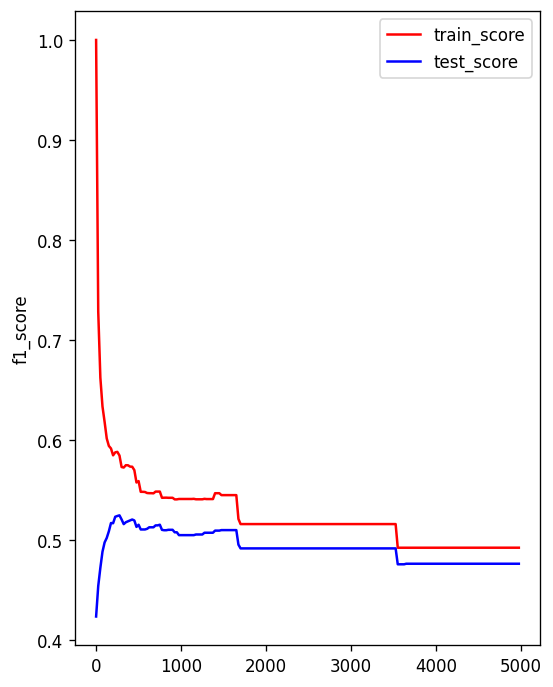

In [ ]:
effect(train,test,min_sample,"minimum sample split")

In [ ]:
# max_leaf_nodes=maximum number of terminal nodes
max_leaf_nodes=[i for i in range(2,500,10)]
train=[]
test=[]
for i in max_leaf_nodes:
  classifier=DTC(class_weight="balanced",max_leaf_nodes=i,random_state=42)
  f1,f2=calc_score(classifier,x_train,y_train,x_test,y_test)

  train.append(f1)
  test.append(f2)

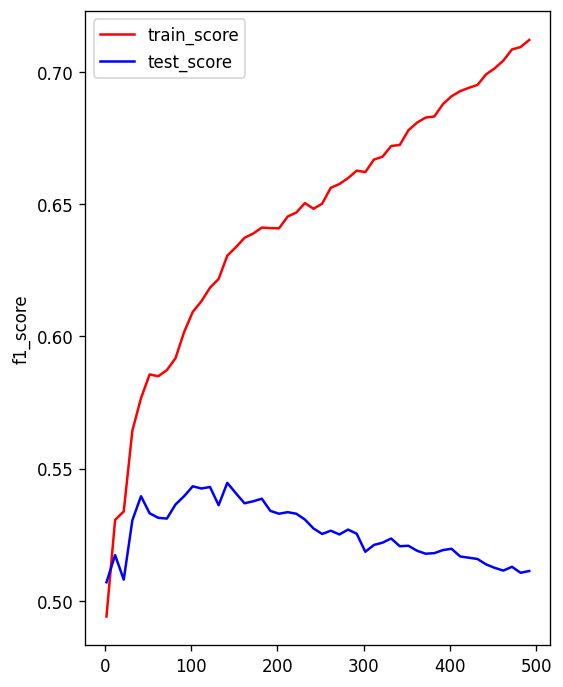

In [ ]:
effect(train,test,max_leaf_nodes,"maximum leaf nodes")

In [ ]:
# min_sample_leaf: minimum number of samples that should be present in a leaf node after splitting
min_sample_leaf=[i for i in range(2,5000,25)]
train=[]
test=[]
for i in min_sample_leaf:
  classifier=DTC(class_weight="balanced",min_samples_leaf=i,random_state=42)
  f1,f2=calc_score(classifier,x_train,y_train,x_test,y_test)

  train.append(f1)
  test.append(f2)

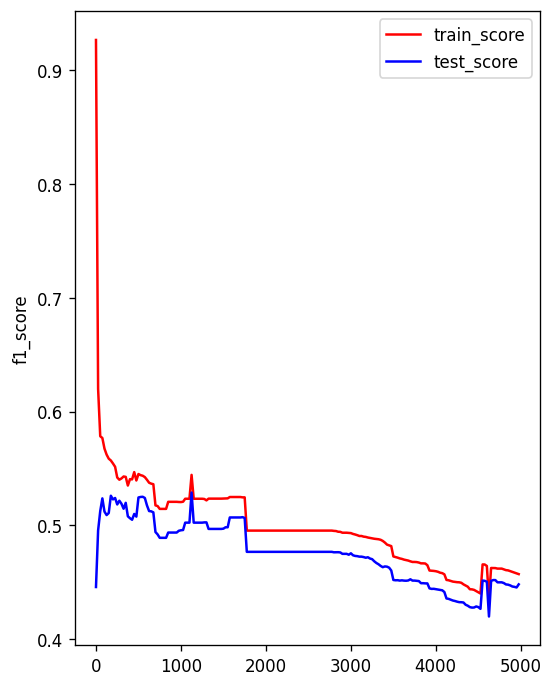

In [ ]:
effect(train,test,min_sample_leaf,"minimum sample leaf")

In [ ]:
# max_depth tunes the model at macro level  
# then tune the other factors at micro level 

In [ ]:
model=DTC(max_depth=9)
model.fit(x_train,y_train)
feature_imp=pd.Series(model.feature_importances_,index=X.columns)
k=feature_imp.sort_values()

<BarContainer object of 19 artists>

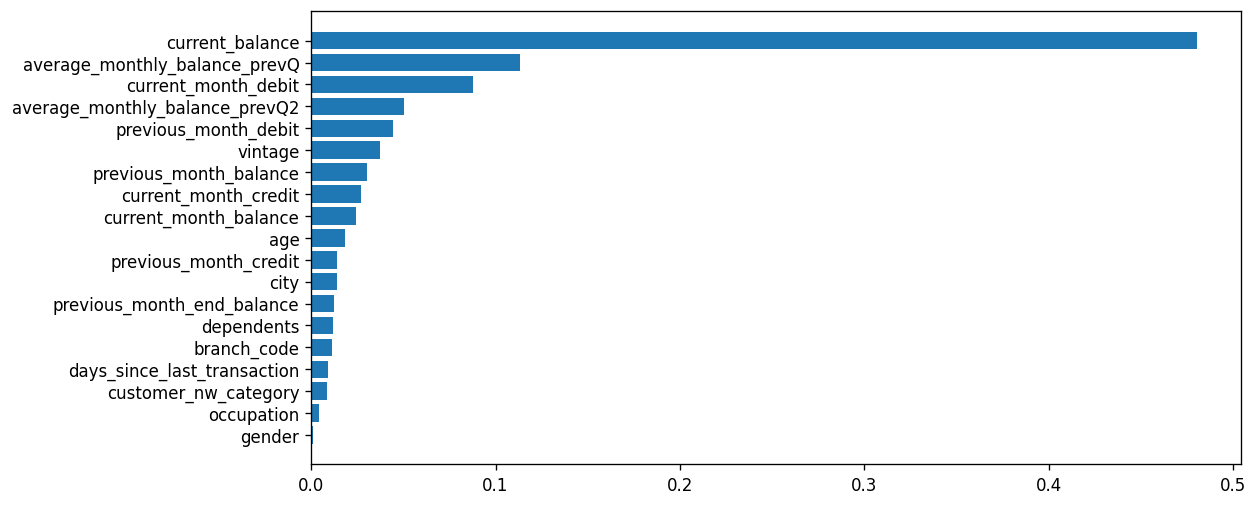

In [ ]:
plt.figure(figsize=(10,5),dpi=120)
plt.barh(k.index,k)